# Laboratorio 5: Análisis de Red
## Universidad del Valle de Guatemala
## CC3094 - Security Data Science - Sección 10
## Oliver De León - 19270
## Julio Herrera - 19402
## Diego Arredondo - 19422

## Parte 1: Análisis de Paquetes

### **Análisis Estadístico**

In [423]:
# Imports
from scapy.all import *
import pandas as pd
import matplotlib.pyplot as plt


1. Capture 10 paquetes con la herramienta scapy, imprima el tipo de datos, la longitud y el contenido del pcap
2. Añada al pcap de 10 paquetes el archivo analisis_paquetes.pcap

In [424]:
# Lectura de paquetes recurrentes y unificación de .pcap preexistente 
conf.promisc = True
# Cargar el archivo pcap existente
paquetes_pcap = rdpcap('analisis_paquetes.pcap')
payload = paquetes_pcap[0].load
# Capturar 10 paquetes en la interfaz de red (si es wifi, cambiar por "Wi-Fi")
#paquetes_capturados = sniff(count=10, iface="Wi-Fi")
paquetes_capturados = sniff(count=10)

# Combinar los paquetes capturados y los del archivo pcap en una lista
paquetes_total = PacketList(paquetes_capturados + paquetes_pcap)


3. Convierta el pcap a un DataFrame
4. Muestre los valores de las columnas: Src Addres, Dst Address, Src Port y Dst Port

In [425]:
# Crear el DataFrame con las columnas solicitadas
df = pd.DataFrame({'Src Address': [p[IP].src for p in paquetes_total if IP in p],
                   'Dst Address': [p[IP].dst for p in paquetes_total if IP in p],
                   'Src Port': [p[TCP].sport if TCP in p else p[UDP].sport for p in paquetes_total if IP in p],
                   'Dst Port': [p[TCP].dport if TCP in p else p[UDP].dport for p in paquetes_total if IP in p],
                   #'Payload Bytes': [bytes_hex(p[Raw].load) if Raw in p else 0 for p in paquetes_total if IP in p],
                   'Payload': [p[Raw].load.hex() if Raw in p else 0 for p in paquetes_total if IP in p]})

# Mostrar el DataFrame
df

,Src Address,Dst Address,Src Port,Dst Port,Payload
0,192.168.1.11,13.89.178.26,19259,443,d11e25c43331ae48b6fa72f3eb9481168bc0cbcae17813...
1,13.89.178.26,192.168.1.11,443,19259,0
2,192.168.1.11,13.89.178.26,19259,443,164635d5abd4a9907abc343213ede7f7d46fcedc8ca444...
3,192.168.1.11,13.89.178.26,19259,443,4db108cf11ee0709fdc69102b9abe9e0ef7b453676bfd8...
4,13.89.178.26,192.168.1.11,443,19259,0
...,...,...,...,...,...
67,84.54.22.33,10.1.10.53,53,53,0
68,10.1.10.53,84.54.22.33,53,53,efbfbd5848046a1700efbfbd5535351b3536efbfbd030a...
69,84.54.22.33,10.1.10.53,53,53,0
70,10.1.10.53,84.54.22.33,53,53,77efbfbd0410efbfbd5b79efbfbdefbfbd34efbfbdefbf...


### Estadísticas

In [426]:
# IP Origen más frecuente

ip_mas_frecuente = df['Src Address'].mode()[0]
print("La dirección IP de origen más frecuente es:", ip_mas_frecuente)

La dirección IP de origen más frecuente es: 10.1.10.53


In [427]:
# IP Destino más frecuente

ip_mas_frecuente = df['Dst Address'].mode()[0]
print("La dirección IP de origen más frecuente es:", ip_mas_frecuente)

La dirección IP de origen más frecuente es: 10.1.10.53


In [428]:
# ¿A qué IPs se comunica la IP de Origen más frecuente?

ip_origen_mas_frecuente = df['Src Address'].mode()[0]
ips_destino = df.loc[df['Src Address'] == ip_origen_mas_frecuente, 'Dst Address'].unique()
print("La dirección IP de origen más frecuente es:", ip_origen_mas_frecuente)
print("Se comunica con las siguientes direcciones IP de destino:", ips_destino)

La dirección IP de origen más frecuente es: 10.1.10.53
Se comunica con las siguientes direcciones IP de destino: ['84.54.22.33' '75.75.75.75']


In [429]:
# ¿A qué puertos destino se comunica la IP de Origen más frecuente?

ip_mas_frecuente = df['Src Address'].value_counts().index[0]
df_ip_frecuente = df[df['Src Address'] == ip_mas_frecuente]
puertos_destino_unicos = df_ip_frecuente['Dst Port'].unique()
print('Se comunica con los siguientes puertos',puertos_destino_unicos)

Se comunica con los siguientes puertos [53]


In [430]:
# ¿A qué puertos origen se comunica la IP de Destino más frecuente?

ip_mas_frecuente = df['Dst Address'].value_counts().index[0]
df_ip_frecuente = df[df['Dst Address'] == ip_mas_frecuente]
puertos_origen_unicos = df_ip_frecuente['Src Port'].unique()
print('Se comunica con los siguientes puertos',puertos_origen_unicos)

Se comunica con los siguientes puertos [53]


### Indique el propósito de los puertos que más aparece en los incisos anteriores
<br>
<div style="text-align: justify">
    El puerto <b>53</b> se utiliza comúnmente para el protocolo de sistema de nombres de dominio (DNS), que permite la resolución de nombres de dominio en direcciones IP. Cuando un usuario ingresa una URL en un navegador web, el navegador envía una solicitud DNS al servidor DNS designado para obtener la dirección IP correspondiente del servidor web que aloja la página web solicitada. Esta solicitud se realiza en el puerto 53 del servidor DNS. Por lo tanto, el puerto 53 es esencial para la navegación web y para la comunicación en línea en general.
</div>

## Gráficas

Gráfica 2D, en el eje Y las IPs origen, y en el eje X la suma de los payloads enviados de dichas direcciones.

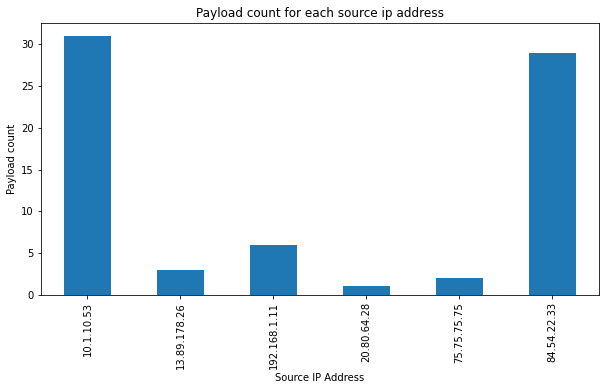

In [431]:
# payload count for each source ip address
payload_count = df.groupby('Src Address')['Payload'].count()
# plot the graph
payload_count.plot(kind='bar', figsize=(10, 5))
plt.title('Payload count for each source ip address')
plt.xlabel('Source IP Address')
plt.ylabel('Payload count')
plt.show()

Muestre una gráfica 2D, en el eje Y las IPs destino, y en el eje X la suma de los payloads recibidos en dichas direcciones.

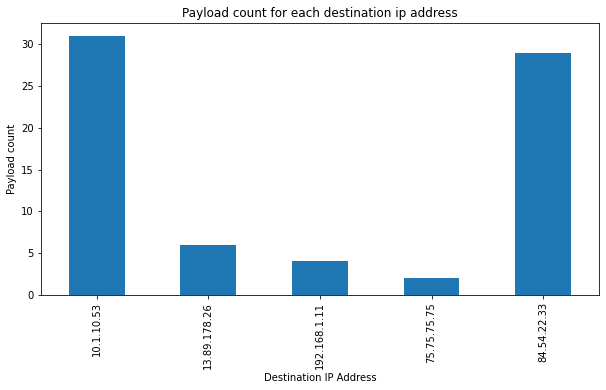

In [432]:
payload_count = df.groupby('Dst Address')['Payload'].count()
# plot the graph
payload_count.plot(kind='bar', figsize=(10, 5))
plt.title('Payload count for each destination ip address')
plt.xlabel('Destination IP Address')
plt.ylabel('Payload count')
plt.show()

Muestre una gráfica 2D, en el eje Y los puertos origen, y en el eje X la suma de los payloads enviados de dichos puertos.

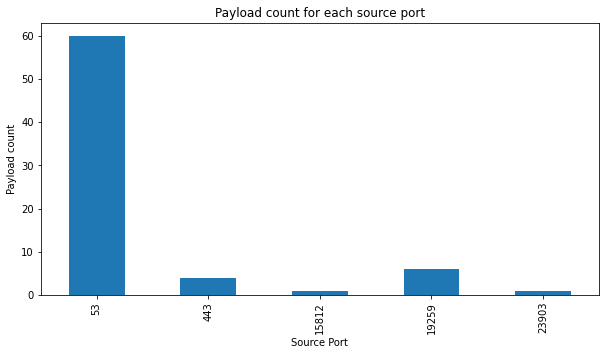

In [433]:
payload_count = df.groupby('Src Port')['Payload'].count()
# plot the graph
payload_count.plot(kind='bar', figsize=(10, 5))
plt.title('Payload count for each source port')
plt.xlabel('Source Port')
plt.ylabel('Payload count')
plt.show()

Muestre una gráfica 2D, en el eje Y los puertos destino, y en el eje X la suma de los payloads recibidos en dichos puertos.

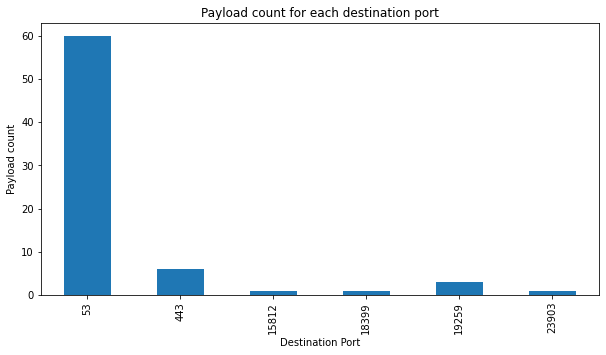

In [434]:
payload_count = df.groupby('Dst Port')['Payload'].count()
# plot the graph
payload_count.plot(kind='bar', figsize=(10, 5))
plt.title('Payload count for each destination port')
plt.xlabel('Destination Port')
plt.ylabel('Payload count')
plt.show()

## Investigación del payload

Cree un nuevo DF que incluya únicamente las conexiones con la dirección IP origen más frecuente

In [435]:
ip_mas_frecuente = df['Src Address'].mode()[0]
# new dataframe with only the most frequent source ip address
df_ip_frecuente = df[df['Src Address'] == ip_mas_frecuente]
df_ip_frecuente.head()

,Src Address,Dst Address,Src Port,Dst Port,Payload
10,10.1.10.53,84.54.22.33,53,53,efbfbd504e470d0a1a0a0000000d494844520000016200...
12,10.1.10.53,84.54.22.33,53,53,3aefbfbd6c653ac7a9efbfbdefbfbdefbfbd0cefbfbdef...
14,10.1.10.53,84.54.22.33,53,53,efbfbdefbfbd5e6eefbfbd2727efbfbdefbfbdefbfbd24...
16,10.1.10.53,84.54.22.33,53,53,e48e91426a5fefbfbd610defbfbdefbfbdefbfbd04efbf...
18,10.1.10.53,84.54.22.33,53,53,efbfbdefbfbdefbfbdcbb4efbfbd16efbfbdefbfbd726a...


Obtenga un nuevo DF con las columnas Src Address, Dst Address y agrúpelas por payload

In [436]:
# group by Payload in new dataframe with Src Address and Dst Address
adresses_by_payload = df.groupby(['Payload'])['Payload', 'Src Address', 'Dst Address']
adresses_by_payload.head()

C:\Users\julio\AppData\Local\Temp\ipykernel_8052\171978872.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  adresses_by_payload = df.groupby(['Payload'])['Payload', 'Src Address', 'Dst Address']


,Payload,Src Address,Dst Address
0,d11e25c43331ae48b6fa72f3eb9481168bc0cbcae17813...,192.168.1.11,13.89.178.26
1,0,13.89.178.26,192.168.1.11
2,164635d5abd4a9907abc343213ede7f7d46fcedc8ca444...,192.168.1.11,13.89.178.26
3,4db108cf11ee0709fdc69102b9abe9e0ef7b453676bfd8...,192.168.1.11,13.89.178.26
4,0,13.89.178.26,192.168.1.11
5,827151781c8b0e7f796d35be6116f5ae9f9c04b8978597...,192.168.1.11,13.89.178.26
6,6f94ad2c3343c8a912a4aa013d13bee4a9bed77f9206d0...,192.168.1.11,13.89.178.26
7,0,13.89.178.26,192.168.1.11
8,137d36fa7ce389638eee9cc88f59513a00bb0cba694411...,192.168.1.11,13.89.178.26
9,0,20.80.64.28,192.168.1.11


Obtenga la IP que más ha intercambiado bytes con la IP más frecuente. Esta IP es sospechosa por la cantidad de bytes intercambiados, entre todas las direcciones.

In [437]:
# new column in dataframe with the length of the Payload
# 'Payload Bytes Size': [len(p[Raw].load) if Raw in p else 0 for p in paquetes_total if IP in p]})
df['Payload Bytes Length'] = [len(p[Raw].load) if Raw in p else 0 for p in paquetes_total if IP in p]
df.head()

,Src Address,Dst Address,Src Port,Dst Port,Payload,Payload Bytes Length
0,192.168.1.11,13.89.178.26,19259,443,d11e25c43331ae48b6fa72f3eb9481168bc0cbcae17813...,1412
1,13.89.178.26,192.168.1.11,443,19259,0,0
2,192.168.1.11,13.89.178.26,19259,443,164635d5abd4a9907abc343213ede7f7d46fcedc8ca444...,1412
3,192.168.1.11,13.89.178.26,19259,443,4db108cf11ee0709fdc69102b9abe9e0ef7b453676bfd8...,1412
4,13.89.178.26,192.168.1.11,443,19259,0,0


In [438]:
# Sum Payload Bytes Length for each Src Address and Dst Address
payload_bytes_length = df.groupby(['Src Address', 'Dst Address'])['Payload Bytes Length'].sum()
# order by Payload Bytes Length in descending order
payload_bytes_length = payload_bytes_length.sort_values(ascending=False)
payload_bytes_length.head()

Src Address   Dst Address 
10.1.10.53    84.54.22.33     27167
192.168.1.11  13.89.178.26     8472
10.1.10.53    75.75.75.75         0
13.89.178.26  192.168.1.11        0
20.80.64.28   192.168.1.11        0
Name: Payload Bytes Length, dtype: int64

In [439]:
print('ip mas frecuente: ', ip_mas_frecuente)
suspect_ip = ''
# keep only the rows if the Src Address or the Dst Address is the most frequent ip address
for i in range(len(payload_bytes_length)):
    if payload_bytes_length.index[i][0] == ip_mas_frecuente or payload_bytes_length.index[i][1] == ip_mas_frecuente:
        print('Source Address: ', payload_bytes_length.index[i][0])
        print('Destination Address: ', payload_bytes_length.index[i][1])
        print('Payload Bytes Length: ', payload_bytes_length[i])
        if payload_bytes_length.index[i][0] == ip_mas_frecuente:
            suspect_ip = payload_bytes_length.index[i][1]
        else:
            suspect_ip = payload_bytes_length.index[i][0]
        break

ip mas frecuente:  10.1.10.53
Source Address:  10.1.10.53
Destination Address:  84.54.22.33
Payload Bytes Length:  27167


Cree un nuevo DF con la conversación entre la IP más frecuente y la IP sospechosa.

In [440]:
# new dataframe where the Src Address or the Dst Address is the most frequent ip address or the suspect ip address
df_suspect_conv = df[(df['Src Address'] == ip_mas_frecuente) | (df['Dst Address'] == ip_mas_frecuente) | (df['Src Address'] == suspect_ip) | (df['Dst Address'] == suspect_ip)]
df_suspect_conv.head()

,Src Address,Dst Address,Src Port,Dst Port,Payload,Payload Bytes Length
10,10.1.10.53,84.54.22.33,53,53,efbfbd504e470d0a1a0a0000000d494844520000016200...,905
11,84.54.22.33,10.1.10.53,53,53,0,0
12,10.1.10.53,84.54.22.33,53,53,3aefbfbd6c653ac7a9efbfbdefbfbdefbfbd0cefbfbdef...,919
13,84.54.22.33,10.1.10.53,53,53,0,0
14,10.1.10.53,84.54.22.33,53,53,efbfbdefbfbd5e6eefbfbd2727efbfbdefbfbdefbfbd24...,956


Obtenga los payloads del DF del inciso 6, y añada cada uno en un array.
Muestre el contenido del array.

In [449]:
# get the 'Payload' of df_suspect_conv and put it in an array
import codecs
payload_array = df_suspect_conv['Payload'].values
for i in range(len(payload_array)):
    if payload_array[i] != 0:
        print(f'Payload from {df_suspect_conv["Src Address"].values[i]} to {df_suspect_conv["Dst Address"].values[i]}: ')
        print(bytearray.fromhex(payload_array[i]).decode())
        print('\n')

Payload from 10.1.10.53 to 84.54.22.33: 
�PNG

IHDR  b      (�TR  :�IDATx��	|T�����;K�
�����iaK����u}Ųw�d���"`:����&�9Ɛ� ��1ҌQHP*�@O4���7<y�.9���a2@a��&"��c�kO�s@�9�i�4X�x�K�a!f��0w��3dx"���C(�}�0|q�*���a!f�4��.�sKg]=9NԂ��u���K_�e*���Px��%���3��"E?���+H�]Q�k����8�"�4v�2���咯̸|�x.\�-b�I�B���@�L��CJ]XWQ����uQ�kQ�N�1 ���2�03�\�@!�H�BJqG'+�R�U\[����GXC;��Ԏ�q�!�r�s=�rԴ���_S�%�ph�aY����c���P�9�


Payload from 10.1.10.53 to 84.54.22.33: 
:�le:ǩ������:|�X��q.e���a0�J}4
9$vz�R�uO/��;ǫ]��M"�rTӣH1i��˥Ͱ3L<k�_R,��F��䘡0]���SY��qi3,�D�����c{O��n�QK�
O��I���2�5h�ڮ%ꀌ����)�_V�r+=9��ID���:L�c����R�7c�-�]D�qw���p�d}�M(##�ڿ{ˢL�s�'�2^K�;{r�Q2w�p;.���1ؕK����b���;���=N�� 7''k��u��O���a�\db�$a��Fd����3Z��(!Ĺ���Wj�_S=^�W?�%�� �R��K ��{mV8B<���,x=#�i�%dL�����=k��]���Ɩ��
�^���~z��Pv.��� ~��


Payload from 10.1.10.53 to 84.54.22.33: 
c��E�<�S¡�ÏNY$ X�94��pְ����+¦���0�SU�j�{A"z�C�P�{��e�1s��������`���µM�p��a�S��;� 

#### Examine los primeros bytes del contenido, ¿encuentra algún dato que no haga sentido que se envíe a través del puerto explicado en el inciso f?

El puerto explicado en el inciso f es el puerto 53, el cual se utiliza para el protocolo de sistema de nombres de dominio (DNS), que permite la resolución de nombres de dominio en direcciones IP, por lo que esperamos ver mensajes con direcciones IP o nombres de dominio, pero en el payload se encuentran caracteres que no son parte de una dirección IP o un nombre de dominio, si bien pueden estar cifrados estos datos, no parecen ser consistentes para una comunicación de DNS.